# Example of usage of Sorbetto for the TSW project 10 

In [1]:
import os
import json

## Load data

In [2]:
PATH_DATA = os.path.join(os.getcwd(), "data", "TSW_project10_data.json")

f = open(PATH_DATA)
entity_project10 = json.load(f)
f.close()

proba_tn = entity_project10["proba_tn"]
proba_fp = entity_project10["proba_fp"]
proba_fn = entity_project10["proba_fn"]
proba_tp = entity_project10["proba_tp"]
print(
    f"proba_tn: {proba_tn:.3f}, proba_fp: {proba_fp:.3f}, proba_fn: {proba_fn:.3f}, proba_tp: {proba_tp:.3f}"
)

prior_pos = proba_tp + proba_fn
prior_neg = proba_tn + proba_fp
print(f"Prior positive: {prior_pos:.3f}, Prior negative: {prior_neg:.3f}")

proba_tn: 0.863, proba_fp: 0.019, proba_fn: 0.011, proba_tp: 0.107
Prior positive: 0.119, Prior negative: 0.881


## Get Value Tile 

In [3]:
from sorbetto.performance.two_class_classification_performance import (
    TwoClassClassificationPerformance,
)
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.tile.value_tile import ValueTile
from sorbetto.flavor.value_flavor import ValueFlavor
from sorbetto.annotation.annotation_text import AnnotationText
from sorbetto.annotation.annotation_isovalue_curves import AnnotationIsovalueCurves
from sorbetto.annotation.annotation_curve_fixed_class_priors import (
    AnnotationCurveFixedClassPriors,
)
from sorbetto.ranking.ranking_score import RankingScore

In [4]:
import numpy as np

In [5]:
# Create the performance, flavor, and tile objects
project10_performance = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)
project10_value_flavor = ValueFlavor(performance=project10_performance)
project10_value_tile = ValueTile(
    name="Value Tile for Project 10",
    parameterization=ParameterizationDefault(),
    flavor=project10_value_flavor,
)

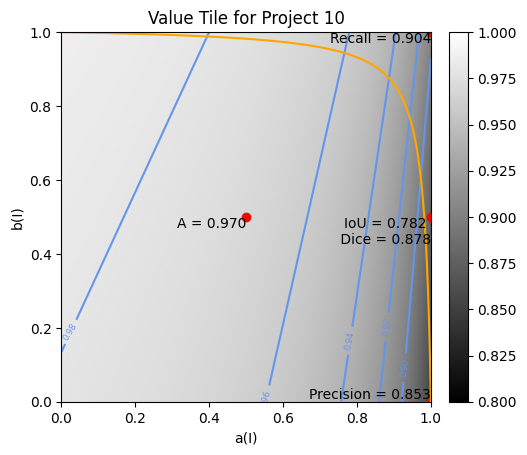

In [6]:
project10_value_tile.clearAnnotations()

# Add annotations
accuracy_score = RankingScore.getAccuracy()
accuracy_value = accuracy_score(project10_performance)
accuracy_point_annotation = AnnotationText(
    location=accuracy_score, label=f"A = {accuracy_value:.3f}", color="red"
)
project10_value_tile.appendAnnotation(accuracy_point_annotation)

IoU_score = RankingScore.getIntersectionOverUnion()
IoU_value = IoU_score(project10_performance)
dice_score = RankingScore.getDiceSorensenCoefficient()
dice_value = dice_score(project10_performance)
IoU_point_annotation = AnnotationText(
    location=IoU_score,
    label=f"IoU = {IoU_value:.3f} \n Dice = {dice_value:.3f}",
    color="red",
)
project10_value_tile.appendAnnotation(IoU_point_annotation)

precision_score = RankingScore.getPrecision()
precision_value = precision_score(project10_performance)
precision_point_annotation = AnnotationText(
    location=precision_score, label=f"Precision = {precision_value:.3f}", color="red"
)
project10_value_tile.appendAnnotation(precision_point_annotation)

recall_score = RankingScore.getRecall()
recall_value = recall_score(project10_performance)
recall_point_annotation = AnnotationText(
    location=RankingScore.getRecall(), label=f"Recall = {recall_value:.3f}", color="red"
)
project10_value_tile.appendAnnotation(recall_point_annotation)

isolines_annotation = AnnotationIsovalueCurves(levels=[0.9, 0.92, 0.94, 0.96, 0.98])
project10_value_tile.appendAnnotation(isolines_annotation)

prior_annotation = AnnotationCurveFixedClassPriors(priorPos=prior_pos, c="orange")
project10_value_tile.appendAnnotation(prior_annotation)

# Draw the Value Tile
fig, ax = project10_value_tile.draw()
ax.images[-1].set_clim(0.8, 1)

In [7]:
project10_value_tile.getExplanation()

'Explanation for this tile is not implemented yet'

## Get Entity Tile "who's first?" with the two no-skill performances 

In [8]:
# Compute the two no-skill performances
project10_noskill_pos_performance = TwoClassClassificationPerformance(
    ptn=0.0, pfp=prior_neg, pfn=0.0, ptp=prior_pos
)
project10_noskill_neg_performance = TwoClassClassificationPerformance(
    ptn=prior_neg, pfp=0.0, pfn=prior_pos, ptp=0.0
)

In [9]:
from sorbetto.core.entity import Entity
from sorbetto.tile.entity_tile import EntityTile
from sorbetto.flavor.entity_flavor import EntityFlavor


/home/pernas/trail/sorbetto/sorbetto/ranking/ranking_score.py:394: RuntimeWarning: invalid value encountered in divide
  return satisfying / (satisfying + unsatisfying)


1 : NoSkillNeg
2 : NoSkillPos
3 : Project10


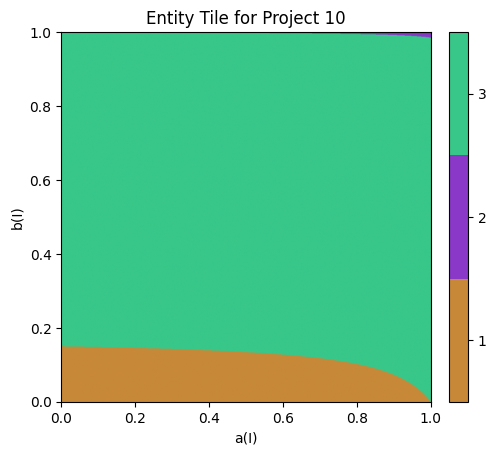

In [10]:
# Create the entities
project10_noskill_pos_entity = Entity(
    project10_noskill_pos_performance, name="NoSkillPos", color="#8938C7"
)
project10_noskill_neg_entity = Entity(
    project10_noskill_neg_performance, name="NoSkillNeg", color="#C78938"
)
project10_entity = Entity(project10_performance, name="Project10", color="#38C789")

# Create the entity flavor and entity tile
project10_entity_flavor = EntityFlavor(
    rank=1,
    entity_list=list(
        [project10_noskill_pos_entity, project10_noskill_neg_entity, project10_entity]
    ),
)
project10_entity_tile = EntityTile(
    name="Entity Tile for Project 10",
    parameterization=ParameterizationDefault(),
    flavor=project10_entity_flavor,
    resolution=1001,
)

# Draw the entity tile
project10_entity_tile.draw()

for i in range(1, project10_entity_tile.flavor.nb_entities + 1):
    print(f"{i} : {project10_entity_tile.flavor.reverse_mapper(i).name}")

## Get Ranking Tile for Project 10

In [11]:
from sorbetto.tile.ranking_tile import RankingTile
from sorbetto.flavor.ranking_flavor import RankingFlavor

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Ranking Tile for Project 10'}, xlabel='a(I)', ylabel='b(I)'>)

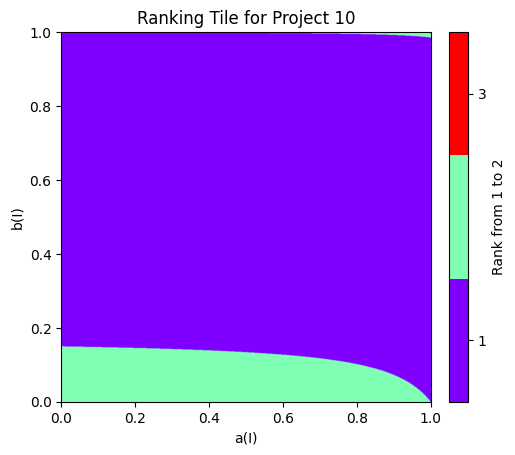

In [12]:
# Create the ranking flavor and ranking tile
project10_ranking_flavor = RankingFlavor(
    entity=project10_entity,
    entity_list=[
        project10_noskill_pos_entity,
        project10_noskill_neg_entity,
        project10_entity,
    ],
)
project10_ranking_tile = RankingTile(
    name="Ranking Tile for Project 10",
    parameterization=ParameterizationDefault(),
    flavor=project10_ranking_flavor,
)

# Draw the ranking tile
project10_ranking_tile.draw()